In [2]:
from pathlib import Path
from ultralytics import YOLO
from ultralytics.engine.results import Results
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from math import ceil

In [3]:
model_path = Path.cwd().parent/'models'/'my_model.pt'
model = YOLO(model_path)

In [4]:
test_img = r"C:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\shelf-scanner\data\raw\images\20250710_232349.jpg"
pred = model.predict(test_img)


image 1/1 C:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\shelf-scanner\data\raw\images\20250710_232349.jpg: 640x384 1 Bateria Duracell AA 2Und, 1 Bateria Duracell AAA 2Und, 1 Bateria Energizer A23 2Und, 1 Bateria Energizer Max 9V, 1 Bateria Energizer Max AA 2Und, 1 Bateria Energizer Max AA 4 Und, 2 Bateria Energizer Max AAA 2 Unds, 1 Bateria Energizer Max AAA 4 Und, 1 Bateria Energizer Max C 2 Und, 1 Bateria Energizer Max D Alkalina 2 Und, 1 Bateria Kodak 9V EHD, 1 Bateria Philips Power Alkaline AA 2Und, 1 Bateria Philips Power Alkaline AAA 2Und, 1 Linterna Rayovac Recargable Mini 5 Led, 493.5ms
Speed: 19.6ms preprocess, 493.5ms inference, 35.9ms postprocess per image at shape (1, 3, 640, 384)


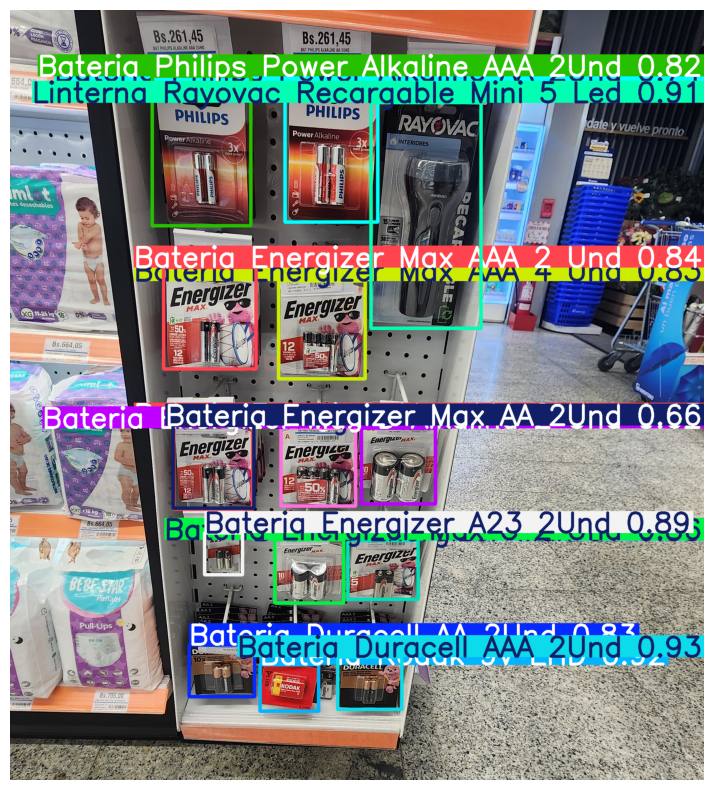

In [5]:
point = pred[0].boxes.xywh[0]

orig_img = (pred[0]).plot()
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))

plt.scatter(point[0], point[1], c='orange')

plt.imshow(img[500:3000])
plt.axis('off')
plt.show()


In [6]:
def getcoor(string):
    string2 = string.split('\n')

    string3 = [strn.split(' ') for strn in string2]
    for j, vec in enumerate(string3):
        for i, val in enumerate(vec):
            string3[j][i] = float(val)
    df = pd.DataFrame(string3, columns=['class','x','y','w','h'])
    df['position_id'] = list(range(df.shape[0]))
    
    return df

correct_labels = """13 0.4851793081561408 0.13284671532846715 0.2640431609013011 0.15182481751824817
12 0.20133291018724211 0.13138686131386862 0.26404316090130114 0.15766423357664233
6 0.20298317994287526 0.3131386861313868 0.26074262139003485 0.1562043795620438
7 0.49343065693430643 0.31240875912408755 0.2541415423675023 0.15766423357664233
4 0.19968264043160897 0.5145985401459854 0.26074262139003485 0.15620437956204378
5 0.49013011742304013 0.5131386861313868 0.2541415423675023 0.1474452554744525
9 0.7756267851475721 0.5131386861313867 0.2640431609013011 0.15036496350364956
2 0.20298317994287524 0.7014598540145984 0.2013329101872421 0.12408759124087589
8 0.49343065693430643 0.7145985401459853 0.2541415423675023 0.15036496350364964
3 0.8317359568390985 0.7094890510948904 0.25744208187876866 0.13430656934306584
0 0.2062837194541415 0.8905109489051094 0.25414154236750236 0.14598540145985395
0 0.4917803871786733 0.8927007299270072 0.23763884481117103 0.15036496350364956
1 0.8350364963503648 0.8934306569343065 0.25084100285623606 0.14598540145985395
14 0.8300856870834654 0.19781021897810216 0.2805458584576323 0.27299270072992693"""

base_order_matrix = getcoor(correct_labels)
base_order_matrix.x = StandardScaler().fit_transform(base_order_matrix[['x']])
base_order_matrix.y = StandardScaler().fit_transform(base_order_matrix[['y']])
position_finder = KNeighborsClassifier(n_neighbors=1)
position_finder.fit(base_order_matrix[['x','y']], base_order_matrix.position_id)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
class_dic = {
    0: "Bateria Duracell AA 2Und",
    1: "Bateria Duracell AAA 2Und",
    2: "Bateria Energizer A23 2Und",
    3: "Bateria Energizer Max 9V",
    4: "Bateria Energizer Max AA 2Und",
    5: "Bateria Energizer Max AA 4 Und",
    6: "Bateria Energizer Max AAA 2 Und",
    7: "Bateria Energizer Max AAA 4 Und",
    8: "Bateria Energizer Max C 2 Und",
    9: "Bateria Energizer Max D Alkalina 2 Und",
    10: "Bateria Kodak 9V EHD",
    11: "Bateria Philips Boton Litio 2032 X5",
    12: "Bateria Philips Power Alkaline AA 2Und",
    13: "Bateria Philips Power Alkaline AAA 2Und",
    14: "Linterna Rayovac Recargable Mini 5 Led"
}

In [ ]:
def preprocess_result_boxes(df: pd.DataFrame):
    scaler = StandardScaler()
    df.x = scaler.fit_transform(df[['x']])
    df.y = scaler.fit_transform(df[['y']])
    
    return df

In [12]:
def parse_result(result:Results):
    df = pd.DataFrame(result.boxes.xywh, columns=['x', 'y', 'w', 'h'])
    df = preprocess_result_boxes(df)
    df['class'] = result.boxes.cls
    df['position_id'] = position_finder.predict(df[['x', 'y']])
    return df[['class', 'x', 'y', 'w', 'h', 'position_id']]

pred_df = parse_result(pred[0])
pred_df

,class,x,y,w,h,position_id
0,1.0,0.996103,1.315712,207.923340,169.699463,12
1,10.0,-0.082046,1.342423,189.766113,151.286377,11
2,14.0,1.747409,-1.338107,356.717285,732.757996,13
3,2.0,-0.962031,0.581280,122.622375,136.029785,7
4,8.0,0.183239,0.681266,222.991150,205.380127,8
5,6.0,-1.143477,-0.755160,300.159546,330.068604,2
6,0.0,-0.984694,1.245319,212.351257,167.422363,10
7,7.0,0.354376,-0.689109,280.836304,318.054932,3
8,13.0,-1.255564,-1.703930,320.133789,486.240479,1
9,12.0,0.482841,-1.700420,300.416138,458.625610,0


In [13]:
def get_matches(base_df:pd.DataFrame, pred_df:pd.DataFrame):
    def check_item(row):
        row = row[['class','position_id']]
        return (pred_df[['class','position_id']] == row).all(axis=1).any()

    return base_df.apply(check_item, axis=1)
get_matches(base_order_matrix, pred_df)

0     False
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
dtype: bool

In [14]:
def get_comparison(pred_df):
    comparison_df = base_order_matrix[['class','position_id']].copy()
    comparison_df['SKU'] = comparison_df['class'].map(class_dic)
    comparison_df['matches'] = get_matches(base_order_matrix, pred_df)

    return comparison_df

get_comparison(pred_df)

,class,position_id,SKU,matches
0,13.0,0,Bateria Philips Power Alkaline AAA 2Und,False
1,12.0,1,Bateria Philips Power Alkaline AA 2Und,False
2,6.0,2,Bateria Energizer Max AAA 2 Und,True
3,7.0,3,Bateria Energizer Max AAA 4 Und,True
4,4.0,4,Bateria Energizer Max AA 2Und,True
5,5.0,5,Bateria Energizer Max AA 4 Und,True
6,9.0,6,Bateria Energizer Max D Alkalina 2 Und,True
7,2.0,7,Bateria Energizer A23 2Und,True
8,8.0,8,Bateria Energizer Max C 2 Und,True
9,3.0,9,Bateria Energizer Max 9V,True
